In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from collections import Counter

In [2]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization 

In [4]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Data Preprocessing

In [6]:
ar=itemgetter(2,3,5,6)(df.columns)
for i in ar:
    z=0
    for each in df[i].unique():
        df.replace({
            i:{each:z}
        },inplace=True)
        z=z+1
        

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969


In [8]:
X=df.drop(['User_ID','Product_ID','Purchase'],axis=1)
Y=df['Purchase']

In [9]:
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Plots for Visualization

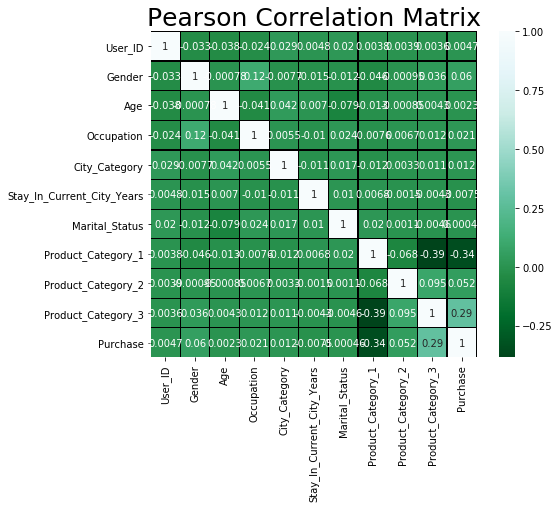

In [11]:
features=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']
f, ax = plt.subplots(figsize=(8,6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


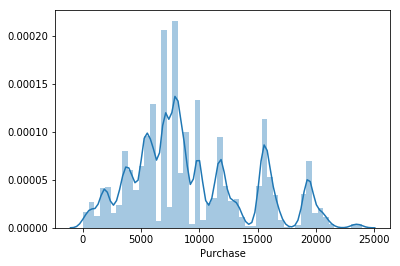

In [12]:
sns.distplot(df['Purchase'])

# Base Model

In [13]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)

In [14]:
def rmse(y,ypred):
    return(np.sqrt(sum((y-ypred)*(y-ypred))/len(y)))

In [15]:
print(rmse(Y_test,pred))

4171.7729179368625


In [16]:
reg.score(X_test,Y_test)

0.3078982657230266

# Base Model Submission

In [17]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [18]:
dft.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
dft['Product_Category_2']=df['Product_Category_2'].fillna(0)
dft['Product_Category_3']=df['Product_Category_3'].fillna(0)
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,0.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,6.0,14.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,0.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,14.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,0.0,0.0


In [ ]:
ar=itemgetter(2,3,5,6)(dft.columns)
for i in ar:
    z=0
    for each in dft[i].unique():
        dft.replace({
            i:{each:z}
        },inplace=True)
        z=z+1
        

In [ ]:
X_test=dft.drop(['User_ID','Product_ID'],axis=1)

In [ ]:
poly=PolynomialFeatures(degree=3)
X_test=poly.fit_transform(X_test)

In [ ]:
pred=reg.predict(X_test)

In [ ]:
print(pred)

[13643.18224224  9816.52772501  6153.79156097 ... 12870.10357269
 11168.51494964  7223.38567718]


In [ ]:
dfans=pd.DataFrame({
    'Prediction':pred
})

In [ ]:
dfans.to_csv('predictions.csv')

# Feature Engineering


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969


In [ ]:
maxdr={}
for each in df['Product_ID'].unique():
    maxdr[each]=0
for each in dft['Product_ID'].unique():
    maxdr[each]=0
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]>maxdr[df['Product_ID'][each]]:
        maxdr[df['Product_ID'][each]]=df['Purchase'][each]

In [ ]:
mindr={}
for each in df['Product_ID'].unique():
    mindr[each]=100000000000
for each in dft['Product_ID'].unique():
    mindr[each]=100000000000
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]<mindr[df['Product_ID'][each]]:
        mindr[df['Product_ID'][each]]=df['Purchase'][each]

In [ ]:
X=df.drop(['User_ID','Product_ID','Purchase','Marital_Status'],axis=1)
Y=df['Purchase']

In [ ]:
product_ID_max=[]
product_ID_min=[]
for each in range(len(df['Product_ID'])):
    product_ID_max.append(maxdr[df['Product_ID'][each]])
for each in range(len(df['Product_ID'])):
    product_ID_min.append(mindr[df['Product_ID'][each]])

In [ ]:
df['product_ID_max']=product_ID_max
df['product_ID_min']=product_ID_min
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_ID_max,product_ID_min
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370,13716,2648
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200,19701,3880
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422,1776,343
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057,1778,365
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969,10073,3920


# Final RMSE


In [ ]:
X=df.drop(['User_ID','Product_ID','Purchase'],axis=1)
Y=df['Purchase']
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
pred1=reg.predict(X_val)
print(rmse(Y_val,pred1))

3018.9868453912763


In [ ]:
DT=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(X_train,Y_train)
pred2=DT.predict(X_val)
print(rmse(Y_val,pred2))

2698.0338183928397


In [ ]:
RT=RandomForestRegressor(max_depth=8, min_samples_leaf=150)
RT.fit(X_train,Y_train)
pred3=RT.predict(X_val)
print(rmse(Y_val,pred3))

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2760.3895566378947


In [ ]:
XG=XGBRegressor(n_estimators=100,learning_rate=0.05)
XG.fit(X_train,Y_train,early_stopping_rounds=5,eval_set=[(X_val,Y_val)],verbose=False)
pred4=XG.predict(X_val)
print(rmse(Y_val,pred4))

2818.561690067555


# Submission of Test Case

In [ ]:
i=0
sum=0
for each in maxdr.keys():
    if maxdr[each] != 0:
        sum=sum+maxdr[each]
        i=i+1
max_mean=sum/i
for each in dft['Product_ID'].unique():
    if maxdr[each] == 0:
        maxdr[each]=max_mean

i=0
sum=0
for each in mindr.keys():
    if mindr[each] != 100000000000:
        sum=sum+maxdr[each]
        i=i+1
min_mean=sum/i
for each in dft['Product_ID'].unique():
    if mindr[each] == 100000000000:
        mindr[each]=min_mean

In [ ]:
product_ID_max=[]
product_ID_min=[]
for each in range(len(dft['Product_ID'])):
    product_ID_max.append(maxdr[dft['Product_ID'][each]])
for each in range(len(dft['Product_ID'])):
    product_ID_min.append(mindr[dft['Product_ID'][each]])

In [ ]:
dft['product_ID_max']=product_ID_max
dft['product_ID_min']=product_ID_min
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,product_ID_max,product_ID_min
0,1000004,P00128942,0,0,7,0,0,1,1,0.0,0.0,19708.0,3933.0
1,1000009,P00113442,0,1,17,1,1,0,3,6.0,14.0,13714.0,3077.0
2,1000010,P00288442,1,2,1,0,2,1,5,0.0,0.0,8900.0,1734.0
3,1000010,P00145342,1,2,1,0,2,1,4,14.0,0.0,3526.0,813.0
4,1000011,P00053842,1,1,1,1,3,0,4,0.0,0.0,3556.0,684.0


In [ ]:
X_test=dft.drop(['User_ID','Product_ID'],axis=1)
pred=XG.predict(X_test)
dfans=pd.DataFrame({
    'Purchase':pred
})
dfans.to_csv('predictions.csv')

# Feature Engineering 2

In [ ]:
IDwise={}
for each in df['Product_ID'].unique():
    IDwise[each]=[]
for each in range(len(df['Product_ID'])):
    IDwise[df['Product_ID'][each]].append(df['Purchase'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_ID_max,product_ID_min
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370,13716,2648
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200,19701,3880
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422,1776,343
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057,1778,365
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969,10073,3920


z=0
for each in df['Product_ID'].unique():
    df.replace({
        'Product_ID':{each:z}
    },inplace=True)
    z=z+1

n1=df['Purchase']
m1=df['Product_ID']

A=pd.DataFrame({
    'A_ID':m1,
    'A_Purchase':n1,
})

xa=A[A['A_ID']<25]['A_ID']
ya=A[A['A_ID']<25]['A_Purchase']

plt.scatter(xa,ya)

In [ ]:
CAT={}
for each in df['Product_ID'].unique():
    CAT[each]=[]

In [ ]:
for each in CAT:
    for i in range(6):
        CAT[each].append(mindr[each]+((maxdr[each]-mindr[each])/5)*i)

In [ ]:
OUR_CAT=[]
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]>=CAT[df['Product_ID'][each]][0] and df['Purchase'][each]<CAT[df['Product_ID'][each]][1]:
        OUR_CAT.append(0)
    elif df['Purchase'][each]>=CAT[df['Product_ID'][each]][1] and df['Purchase'][each]<CAT[df['Product_ID'][each]][2]:
        OUR_CAT.append(1)
    elif df['Purchase'][each]>=CAT[df['Product_ID'][each]][2] and df['Purchase'][each]<CAT[df['Product_ID'][each]][3]:
        OUR_CAT.append(2)
    elif df['Purchase'][each]>=CAT[df['Product_ID'][each]][3] and df['Purchase'][each]<CAT[df['Product_ID'][each]][4]:
        OUR_CAT.append(3)
    elif df['Purchase'][each]>=CAT[df['Product_ID'][each]][4] and df['Purchase'][each]<=CAT[df['Product_ID'][each]][5]:
        OUR_CAT.append(4)

In [ ]:
df['CATAGORY']=OUR_CAT

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_ID_max,product_ID_min,CATAGORY
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370,13716,2648,2
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200,19701,3880,3
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422,1776,343,3
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057,1778,365,2
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969,10073,3920,3


In [ ]:
X=df.drop(['User_ID','Product_ID','product_ID_max','product_ID_min','CATAGORY','Purchase'],axis=1).values
Y=df['CATAGORY'].values

In [ ]:
poly=PolynomialFeatures(degree=2)
X=poly.fit_transform(X)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr.score(X_val,Y_val)

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3514098205682913

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
DT.score(X_val,Y_val)

0.3298943770792808

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train,Y_train)
KNN.score(X_val,Y_val)

0.3343301761593979

In [ ]:
GC=GradientBoostingClassifier()
GC.fit(X_train,Y_train)
GC.score(X_val,Y_val)

In [ ]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,Y_train)
ETC.score(X_val,Y_val)

In [ ]:
votingC=VotingClassifier([('KNN',KNN),('GC',GC),('ETC',ETC),('lr',lr)],voting='soft')
votingC.fit(X_train,Y_train)
y_pred=votingC.predict(X)
votingC.score(X_val,Y_val)

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
Y = to_categorical(Y, num_classes = 5)
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1)

In [ ]:
model=Sequential()
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [ ]:
optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 5
batch_size = 100

In [ ]:
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),verbose=1)

In [ ]:
dft.head()

In [ ]:
catcal_test=df.drop(['User_ID','Product_ID','product_ID_max','product_ID_min','CATAGORY','Purchase'],axis=1).values
catcal_train=dft.drop(['User_ID','Product_ID','product_ID_max','product_ID_min',],axis=1).values
catcal_train=poly.fit_transform(catcal_train)
catcal_test=poly.fit_transform(catcal_test)

In [ ]:
category_test=votingC.predict(catcal_test)
category_train=votingC.predict(catcal_train)

In [ ]:
checker=Counter(category_test)

In [ ]:
print(checker)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
CAT={}
for each in df['Product_ID'].unique():
    CAT[each]=[]
for each in dft['Product_ID'].unique():
    CAT[each]=[]
for each in CAT:
    for i in range(6):
        CAT[each].append(mindr[each]+((maxdr[each]-mindr[each])/5)*i)

In [ ]:
PRICE_X_test=[]
for each in range(len(dft['Product_ID'])):
    if category_test[each]==0:
        PRICE_X_test.append((CAT[dft['Product_ID'][each]][0]+CAT[dft['Product_ID'][each]][1])/2)
    elif category_test[each]==1:
        PRICE_X_test.append((CAT[dft['Product_ID'][each]][1]+CAT[dft['Product_ID'][each]][2])/2)
    elif category_test[each]==2:
        PRICE_X_test.append((CAT[dft['Product_ID'][each]][2]+CAT[dft['Product_ID'][each]][3])/2)
    elif category_test[each]==3:
        PRICE_X_test.append((CAT[dft['Product_ID'][each]][3]+CAT[dft['Product_ID'][each]][4])/2)
    elif category_test[each]==4:
        PRICE_X_test.append((CAT[dft['Product_ID'][each]][4]+CAT[dft['Product_ID'][each]][5])/2)

In [ ]:
PRICE_X_train=[]
for each in range(len(df['Product_ID'])):
    if category_train[each]==0:
        PRICE_X_train.append((CAT[df['Product_ID'][each]][0]+CAT[df['Product_ID'][each]][1])/2)
    elif category_train[each]==1:
        PRICE_X_train.append((CAT[df['Product_ID'][each]][1]+CAT[df['Product_ID'][each]][2])/2)
    elif category_train[each]==2:
        PRICE_X_train.append((CAT[df['Product_ID'][each]][2]+CAT[df['Product_ID'][each]][3])/2)
    elif category_train[each]==3:
        PRICE_X_train.append((CAT[df['Product_ID'][each]][3]+CAT[df['Product_ID'][each]][4])/2)
    elif category_train[each]==4:
        PRICE_X_train.append((CAT[df['Product_ID'][each]][4]+CAT[df['Product_ID'][each]][5])/2)

In [ ]:
df['Cat_wise_price']=PRICE_X_train
dft['Cat_wise_price']=PRICE_X_test

In [ ]:
df.head()

In [ ]:
dft.head()

In [ ]:
X=df.drop(['User_ID','Product_ID','Purchase','CATAGORY'],axis=1).values
Y=df['Purchase'].values
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [ ]:
XG=XGBRegressor(n_estimators=1000,learning_rate=0.05)
pred4=XG.predict(X_val)
pred4=np.array(pred4)
print(mean_squared_error(pred4,Y_val)**0.5)

In [ ]:
X_test=dft.drop(['User_ID','Product_ID'],axis=1).values
pred=XG.predict(X_test)
dfans=pd.DataFrame({
    'Purchase':pred
})
dfans.to_csv('predictions.csv')